<a href="https://colab.research.google.com/github/LMAPcoder/Machine-Learning-Lab/blob/main/Exercise_sheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Programming Machine Learning**

## Exercise Sheet 3

### Exercise 1: Gradient Descent on Rosenbrock function

In mathematical optimization, the Rosenbrock function is a non-convex function which is used as a performance test problem for optimization algorithms. The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.
The function is defined by
\begin{align}
f(x,y) = (a-x)^2+b(y-x^2)^2
\end{align}
The global minimum is known to be at:
\begin{align}
(a,a^2)
\end{align}

Required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

3D plot to visualize the function

In [ ]:
#Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
#given Parameters
a = 1 
b = 100 #given parameter

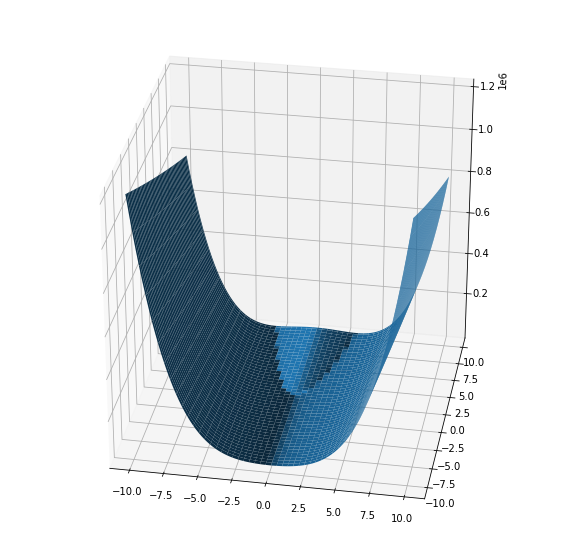

In [ ]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x,y)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') #Add an axes to the current figure and make it the current axes
ax.plot_surface(X,Y,f(X,Y))
ax.view_init(30, -80)
plt.show()

Derive the partial gradients

\begin{align}
\frac{\partial f}{\partial x} &= -4b(y-x^2)x \\
\frac{\partial f}{\partial y} &= 4b(y-x^2) \\
\nabla f &= \begin{pmatrix}
            -2(a-x)-4b(y-x^2)x & \\
            2b(y-x^2)
            \end{pmatrix}
\end{align}

Gradient descent method

\begin{align}
x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)}) 
\end{align}

Conversion of the function and gradient into code representation

In [ ]:
#Partial derivatives of Rosenbrock function
f_x = lambda x,y: -2*(a-x) - 4*b*(y-x**2)*x 
f_y = lambda x,y: 2*b*(y-x**2)

Optimization of the function with Gradient Descent

In [ ]:
K = 10000000 #number of iterations
α = 0.00001 #step length
p_i = np.array([10,10]) #start point
x_i = np.zeros(K)
y_i = np.zeros(K)
for i in range(K):
  x_i[i] = p_i[0]
  y_i[i] = p_i[1]
  g = np.array([f_x(x_i[i],y_i[i]),f_y(x_i[i],y_i[i])]) #gradient
  p_i = p_i - α*g #new point
  f_i = f(x_i[i],y_i[i]) #value of the function in new point

print('The minimum value found is',p_i)


[1. 1.]


Visualize the trajectory on the same 3D plot

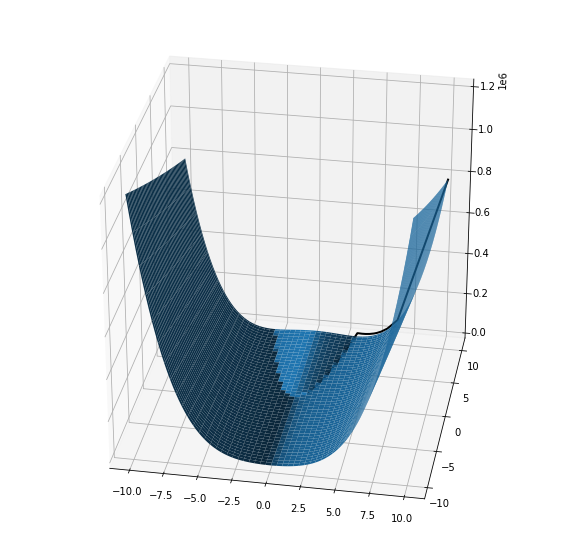

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,f(X,Y))
ax.plot3D(x_i,y_i,f(x_i,y_i),linewidth=2,color='black')
ax.view_init(30, -80)
plt.show()

### Exercise 2: Linear Regression with Gradient Descent

Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) #always print floating point numbers

#### Part A: Datasets

In [ ]:
#Uploading the file from Google drive
parkinsons_id = '1hbrNWoJtyYCv5x_iMP8ACzTvnE0UIg0F'
winequality_id = '1JDPBZBy8YMnQOIwS4smLJH-S7YJZaCHW'
airq402_id = '1de_GlrkD84lE6BITPVxC1kTqWtfHLHWA'

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={parkinsons_id}' -O parkinsons_updrs.data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={winequality_id}' -O winequality-red.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={airq402_id}' -O airq402.data

In [ ]:
winequality = pd.read_csv('winequality-red.csv',sep=';')
parkinsons = pd.read_csv('parkinsons_updrs.data')
airq402 = pd.read_fwf('airq402.data',names=['City1','City2','Avarage fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share1','price']) #read_fwf reads data files that have known and fixed column widths

Brief visualization of the data

Wine quality

In [ ]:
# winequality.head()
winequality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Correlation heatmap
winequality.corr(method='pearson').style.background_gradient(cmap='coolwarm')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Parkinsons

In [ ]:
parkinsons.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
parkinsons.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,0.120350,0.146202,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,0.058736,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,-0.028876,-0.033870,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,0.102349,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


Air prices

In [ ]:
airq402.head()

,City1,City2,Avarage fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [ ]:
airq402.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Avarage fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   market share               1000 non-null   float64
 7   Average fare               1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   market share1              1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [ ]:
print(airq402['City1'].sort_values().unique())
print(airq402['City2'].sort_values().unique())
print(airq402['market leading airline'].sort_values().unique())
print(airq402['Low price airline'].sort_values().unique())

['ABQ' 'ACY' 'ALB' 'AMA' 'ATL' 'AUS' 'BDL' 'BHM' 'BNA' 'BOI' 'BOS' 'BTV'
 'BUF' 'BUR' 'BWI' 'CAE' 'CAK' 'CHS' 'CLE' 'CLT' 'CMH' 'COS' 'CRP' 'CVG'
 'DAY' 'DEN' 'DFW' 'DSM' 'DTW' 'ELP' 'EUG' 'FLL' 'FNT' 'GPT' 'GRR' 'GSO'
 'GSP' 'HRL' 'IAD' 'IAH' 'IND' 'ISP' 'JAX' 'LAS' 'LAX' 'LGA' 'LGB' 'LIT'
 'MCI' 'MCO' 'MDT' 'MEM' 'MHT' 'MIA' 'MKE' 'MSN' 'MSP' 'MSY' 'MYR' 'OAK'
 'OKC' 'OMA' 'ONT' 'ORD' 'ORF' 'PDX' 'PHF' 'PHL' 'PHX' 'PIT' 'PSP' 'PVD'
 'RDU' 'RNO' 'ROC' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC' 'SMF'
 'SNA' 'STL' 'SYR' 'TLH' 'TPA' 'TYS']
['ATL' 'AUS' 'BDL' 'BHM' 'BNA' 'BOS' 'BUF' 'BWI' 'CLE' 'CLT' 'CMH' 'CVG'
 'DAY' 'DEN' 'DFW' 'DSM' 'DTW' 'ELP' 'FLL' 'FNT' 'GEG' 'GPT' 'GSO' 'HPN'
 'HRL' 'IAD' 'IAH' 'ICT' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LGA'
 'LGB' 'LIT' 'MAF' 'MCI' 'MCO' 'MDT' 'MEM' 'MHT' 'MIA' 'MKE' 'MSP' 'MSY'
 'OAK' 'OKC' 'OMA' 'ONT' 'ORD' 'ORF' 'PBI' 'PDX' 'PHF' 'PHL' 'PHX' 'PIT'
 'PNS' 'PVD' 'PWM' 'RDU' 'RIC' 'RNO' 'ROC' 'RSW' 'SAN' 'SAT' 'SAV' 'SDF'
 'SEA' 'SFO' 

Convertion of any non-numeric values to numeric values

There are 3 main aproaches to convert categorical variables into quantitative variables:


*   Drop Categorical Variables
*   Ordinal Encoding (label encoding)
*   One-Hot Encoding

The best of these three aproaches is the one-hot encoding. In order to use these aproach we will use dummy variables.


In [ ]:
airq402_dumm = pd.get_dummies(airq402) #get_dummies is a pandas method to automatically transform all the classes of the catorical variables into dummy variables
airq402_dumm.head()

,Avarage fare,Distance,Average weekly passengers,market share,Average fare,market share1,price,City1_ABQ,City1_ACY,City1_ALB,City1_AMA,City1_ATL,City1_AUS,City1_BDL,City1_BHM,City1_BNA,City1_BOI,City1_BOS,City1_BTV,City1_BUF,City1_BUR,City1_BWI,City1_CAE,City1_CAK,City1_CHS,City1_CLE,City1_CLT,City1_CMH,City1_COS,City1_CRP,City1_CVG,City1_DAY,City1_DEN,City1_DFW,City1_DSM,City1_DTW,City1_ELP,City1_EUG,City1_FLL,City1_FNT,...,City2_SYR,City2_TLH,City2_TPA,City2_TUL,City2_TUS,market leading airline_AA,market leading airline_AS,market leading airline_B6,market leading airline_CO,market leading airline_DL,market leading airline_F9,market leading airline_FL,market leading airline_G4,market leading airline_HP,market leading airline_NK,market leading airline_NW,market leading airline_TZ,market leading airline_UA,market leading airline_US,market leading airline_WN,market leading airline_YX,Low price airline_AA,Low price airline_AQ,Low price airline_AS,Low price airline_AX,Low price airline_B6,Low price airline_CO,Low price airline_DL,Low price airline_F9,Low price airline_FL,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


If required drop out the rows with missing values

Base on the summary of the dataframes gotten through method info(), there are no missing values or NA in the data sets

Dropping columns

The performance of regression model algorithms can be deteriorate if two or more variables are tightly related, called **multicollinearity**. We should remove one of the offending correlated variables to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

For the purpose of this assigment we will remove all the input variables that do not have a correlation of at leat **0.2** with output variable and we will remove one of the input variables in case of multicollinearity when the correlation is higher than **0.8**

In [ ]:
#Function to remove input variables that not impact significantly the output variable
def irrelevance(dataset,corr,output,threshold):
  df_c = dataset.corr(method=corr)
  return df_c.loc[df_c[output] < threshold].index

#Function to remove input variables that have high correlation with other ones
def multicollinearity(dataset,corr,output,threshold):
  df = dataset.corr(method=corr).abs()
  df_c = df.drop(output,axis=1).drop(output)
  to_drop = []
  for x in df_c.index:
    for y in df_c.columns:
      if threshold <= df_c.loc[x][y] < 1:
        if df.loc[x][output] > df.loc[y][output]: #we keep the input variable with higher correlation with the output variable
          to_drop.append(y)
  return to_drop

In [ ]:
#Pre-processing of Winequality data set
threshold_1 = 0.2
threshold_2 = 0.8
corr_method = 'pearson' #Person's method is only sensitive to linear relation ship between variables
opt = 'quality'
winequality_r = winequality.drop(irrelevance(winequality,corr_method,opt,threshold_1),axis=1) #data set with relavant input variables
winequality_c = winequality_r.drop(multicollinearity(winequality_r,corr_method,opt,threshold_2),axis=1) #data set with no-correlated input variables
winequality_c

,citric acid,sulphates,alcohol,quality
0,0.00,0.56,9.4,5
1,0.00,0.68,9.8,5
2,0.04,0.65,9.8,5
3,0.56,0.58,9.8,6
4,0.00,0.56,9.4,5
...,...,...,...,...
1594,0.08,0.58,10.5,5
1595,0.10,0.76,11.2,6
1596,0.13,0.75,11.0,6
1597,0.12,0.71,10.2,5


In [ ]:
#Pre-processing of parkinsons data set
threshold_1 = 0.2
threshold_2 = 0.8
corr_method = 'pearson'
opt = 'total_UPDRS'
parkinsons_r = parkinsons.drop(irrelevance(parkinsons,corr_method,opt,threshold_1),axis=1)
parkinsons_c = parkinsons_r.drop(multicollinearity(parkinsons_r,corr_method,opt,threshold_2),axis=1)
parkinsons_c

,subject#,age,motor_UPDRS,total_UPDRS
0,1,72,28.199,34.398
1,1,72,28.447,34.894
2,1,72,28.695,35.389
3,1,72,28.905,35.810
4,1,72,29.187,36.375
...,...,...,...,...
5870,42,61,22.485,33.485
5871,42,61,21.988,32.988
5872,42,61,21.495,32.495
5873,42,61,21.007,32.007


In [ ]:
#Pre-processing of airq402 data set
threshold_1 = 0.2
threshold_2 = 0.8
corr_method = 'pearson'
opt = 'price'
airq402_r = airq402_dumm.drop(irrelevance(airq402_dumm,corr_method,opt,threshold_1),axis=1)
airq402_c = airq402_r.drop(multicollinearity(airq402_r,corr_method,opt,threshold_2),axis=1)
airq402_c


,Avarage fare,Distance,price,market leading airline_AA,Low price airline_AA
0,114.47,528,111.03,0,0
1,122.47,860,118.94,0,0
2,214.42,852,167.12,0,0
3,69.40,288,68.86,0,0
4,158.13,723,145.42,0,0
...,...,...,...,...,...
995,136.16,1104,118.51,0,0
996,83.28,200,82.55,0,0
997,159.97,814,159.02,0,0
998,73.57,174,73.44,0,0


Split of the data

In [ ]:
percentage = 0.8 #percente of the data used for training the model
airq402_train = airq402_c[:int(airq402.shape[0]*percentage)]
airq402_test = airq402_c[int(airq402.shape[0]*percentage):]
winequality_train = winequality_c[:int(winequality.shape[0]*percentage)]
winequality_test = winequality_c[int(winequality.shape[0]*percentage):]
parkinsons_train = parkinsons_c[:int(parkinsons.shape[0]*percentage)]
parkinsons_test = parkinsons_c[int(parkinsons.shape[0]*percentage):]

#### Part B: Linear Regression with Real-World Data

Loss function
\begin{align}
L(\theta) &= \sum_{i=1}^N (y_i-\hat y_i)^2 \\
L(\theta) &= \frac{1}{N} ||y-X\theta||_2^2
\end{align}
Gradient of the loss function
\begin{align}
\nabla L(\theta) &= - \frac{2}{N} X^T (y-X\theta) \\
\nabla L(\theta) &= - \frac{2}{N} (b-A\theta)
\end{align}
Gradient descent method iteration
\begin{align}
\theta^{(k+1)} &= \theta^{(k)} - \mu \nabla L(\theta^{(k)}) \\
\theta^{(k+1)} &= \theta^{(k)} + \mu \frac{2}{N} (b-A\theta^{(k)})
\end{align}
Errors
\begin{align}
MAE &= \frac{\sum_{i=1}^N |\theta^{(k-1)}_i - \theta^{(k)}_i|}{N} \\
RMSE &= \sqrt{\frac{\sum_{i=1}^N (y_i-\hat y_i)^2}{N}}
\end{align}

Gradient descent function

In [ ]:
#Function to calculate gradient descent, MAE and RMSE
def GD(X_tr,Y_tr,X_te,Y_te,mu,K):
  theta_i = np.zeros((X_tr.shape[1],1))
  mae = np.zeros(K) #array of mean absolute errores between thetas before and after the iteration
  rmse = np.zeros(K) #array of root-mean-square error between predited output on test data and test output data
  for i in range(K):
    Y_te_p = X_te @ theta_i #predited output on the test data
    rmse[i] = RMSE(Y_te,Y_te_p)
    theta_i_b = theta_i
    theta_i = theta_i - mu*gradient(X_tr,Y_tr,theta_i)
    mae[i] = MAE(theta_i_b,theta_i)
  return [theta_i,mae,rmse]

In [ ]:
#Auxiliary fuctions
gradient = lambda X,Y,theta: -2/(Y.shape[0]) * X.T @ (Y - X @ theta)
MAE = lambda theta_b,theta_a: abs(theta_b-theta_a).mean()
RMSE = lambda Y_true,Y_pred: (((Y_true-Y_pred)**2).mean())**(1/2)

##### winequality data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'quality'
X_train = winequality_train.drop(opt,axis=1).to_numpy()
Y_train = winequality_train[opt].to_numpy().reshape(-1,1)
X_test = winequality_test.drop(opt,axis=1).to_numpy()
Y_test = winequality_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
#Gradient descent method to find θ*
mu = 0.001
K = 100
GD_result = GD(X_train,Y_train,X_test,Y_test,mu,K)
print(GD_result[0])

[[0.05465492]
 [0.0196678 ]
 [0.04063516]
 [0.53443255]]


In [ ]:
#For control purpose
A = X_train.T @ X_train
b = X_train.T @ Y_train
β = np.linalg.lstsq(A,b,rcond=None)[0]
print(β)

[[1.44578182]
 [0.47275228]
 [0.68454887]
 [0.3487558 ]]


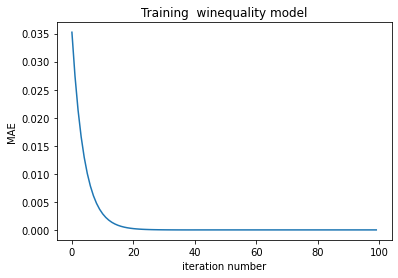

In [ ]:
#plot MEA vs i
plt.title("Training  winequality model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GD_result[1])),GD_result[1])

Last RMSE: 0.7603024006050499


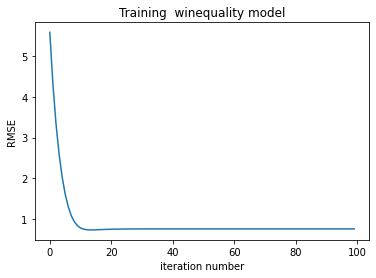

In [ ]:
#plot RMSE,i
plt.title("Training  winequality model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GD_result[2])),GD_result[2])
print('Last RMSE:',GD_result[2][-1])

##### Parkinsons data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'total_UPDRS'
X_train = parkinsons_train.drop(opt,axis=1).to_numpy()
Y_train = parkinsons_train[opt].to_numpy().reshape(-1,1)
X_test = parkinsons_test.drop(opt,axis=1).to_numpy()
Y_test = parkinsons_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
#Gradient descent method to find θ*
mu = 0.0001
K = 100
GD_result = GD(X_train,Y_train,X_test,Y_test,mu,K)
print(GD_result[0])

[[0.00201043]
 [0.01653996]
 [0.17796144]
 [0.77370924]]


In [ ]:
#For control purpose
A = X_train.T @ X_train
b = X_train.T @ Y_train
β = np.linalg.lstsq(A,b,rcond=None)[0]
print(β)

[[ 0.2023258 ]
 [-0.01403174]
 [ 0.05120699]
 [ 1.1949408 ]]


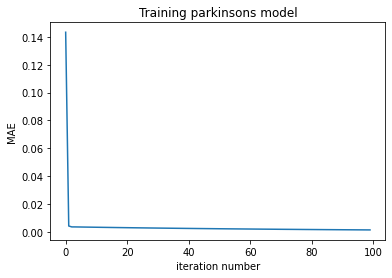

In [ ]:
#plot MEA,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GD_result[1])),GD_result[1])

Last RMSE: 6.0454931142239


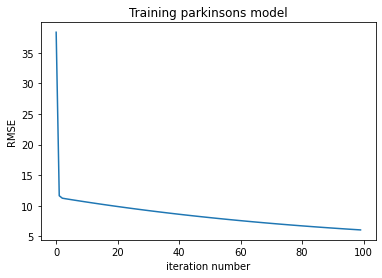

In [ ]:
#plot RMSE,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GD_result[2])),GD_result[2])
print('Last RMSE:',GD_result[2][-1])

##### airq402 data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'price'
X_train = airq402_train.drop(opt,axis=1).to_numpy()
Y_train = airq402_train[opt].to_numpy().reshape(-1,1)
X_test = airq402_test.drop(opt,axis=1).to_numpy()
Y_test = airq402_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
#Gradient descent method to find θ*
mu = 0.0000001
K = 100
GD_result = GD(X_train,Y_train,X_test,Y_test,mu,K)
print(GD_result[0])

[[0.0005664 ]
 [0.09710169]
 [0.10141892]
 [0.00010471]
 [0.00007811]]


In [ ]:
#For control purpose
A = X_train.T @ X_train
b = X_train.T @ Y_train
β = np.linalg.lstsq(A,b,rcond=None)[0]
print(β)

[[22.7768348 ]
 [ 0.66748795]
 [ 0.0074577 ]
 [ 6.21853808]
 [17.02549435]]


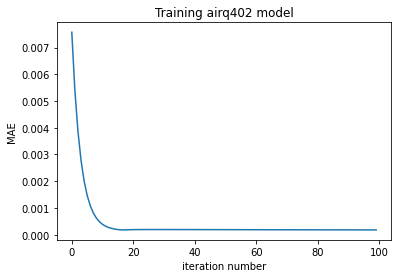

In [ ]:
#plot MEA,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GD_result[1])),GD_result[1])

Last RMSE: 52.95557197568985


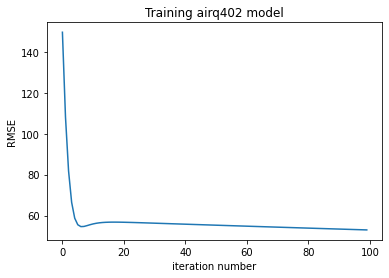

In [ ]:
#plot RMSE,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GD_result[2])),GD_result[2])
print('Last RMSE:',GD_result[2][-1])

### Exercise 3: Steplength Control for Gradient Descent

#### 1. Steplength-backtracking

Stepsize-backtracking algorithm

$ \mu = \mu_0 $

$ \text{While: } f(x + \mu \Delta x) > f(x) + \alpha \mu {\nabla f(x)}^T \Delta x $

> $ \mu = \beta \mu $

$ \text{return } \mu $


Where $\alpha \in (0,0.5)$ and $\beta \in (0,1)$

Stepsize-backtracking **exit** condition
\begin{align}
L(\theta + \mu \Delta \theta) &\leq L(\theta) + \alpha \mu {\nabla L(\theta)}^T \Delta \theta \\
L(\theta - \mu \nabla f(\theta)) &\leq L(\theta) - \alpha \mu {\nabla L(\theta)}^T \nabla L(\theta) \\
L(\theta - \mu \nabla L(\theta)) &\leq L(\theta) - \alpha \mu ||{\nabla L(\theta)}||^2_2
\end{align}
Where
\begin{align}
\nabla L(\theta) &= - \frac{2}{N} X^T (y-X\theta) \\
L(\theta) &= \frac{1}{N} ||y-X\theta||_2^2
\end{align}

In [ ]:
#Function to calculate gradient descent, MAE and RMSE
def GDwB(X_tr,Y_tr,X_te,Y_te,mu,K,alpha,beta):
  theta_i = np.zeros((X_tr.shape[1],1))
  mae = np.zeros(K) #array of mean absolute errores between thetas before and after the iteration
  rmse = np.zeros(K) #array of root-mean-square error between predited output on test data and test output data
  MU = np.zeros(K) #array of step sizes
  for i in range(K):
    Y_te_p = X_te @ theta_i #predited output on the test data
    rmse[i] = RMSE(Y_te,Y_te_p)
    theta_i_b = theta_i
    theta_i = theta_i - mu*gradient(X_tr,Y_tr,theta_i)
    MU[i] = mu
    mu = StepB(X_tr,Y_tr,theta_i,mu,alpha,beta)
    mae[i] = MAE(theta_i_b,theta_i)
  return [theta_i,mae,rmse,MU]

In [ ]:
#Function
def StepB(X,Y,theta,mu,alpha,beta):
  while loss(X,Y,theta - mu * gradient(X,Y,theta)) > loss(X,Y,theta) - alpha * mu * (gradient(X,Y,theta)**2).sum():
    mu = mu * beta
  return mu

In [ ]:
#Auxiliary fuctions
loss = lambda X,Y,theta: ((Y - X @ theta)**2).mean()
gradient = lambda X,Y,theta: -2/(Y.shape[0]) * X.T @ (Y - X @ theta)
MAE = lambda theta_b,theta_a: abs(theta_b-theta_a).mean()
RMSE = lambda Y_true,Y_pred: (((Y_true-Y_pred)**2).mean())**(1/2)

##### winequality data set

In [ ]:
#Split of the data sets into input and output variables
X_train = winequality_train.drop('quality',axis=1).to_numpy()
Y_train = winequality_train['quality'].to_numpy().reshape(-1,1)
X_test = winequality_test.drop('quality',axis=1).to_numpy()
Y_test = winequality_test['quality'].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
#Gradient descent method to find θ* with steplength-backtracking
mu = 0.00001
alpha = 0.5
beta = 0.5
K = 100
GDwB_result = GDwB(X_train,Y_train,X_test,Y_test,mu,K,alpha,beta)
print(GDwB_result[0])

[[0.01017359]
 [0.00301122]
 [0.00681359]
 [0.10655764]]


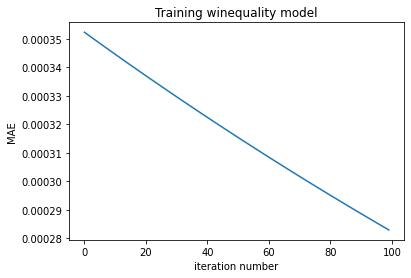

In [ ]:
#plot MEA,i
plt.title("Training winequality model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GDwB_result[1])),GDwB_result[1])

Last RMSE: 4.462012569833899


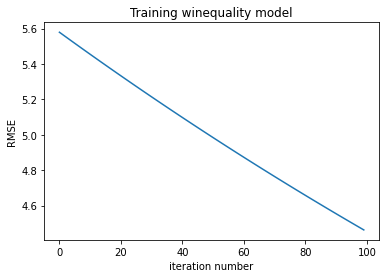

In [ ]:
#plot RMSE,i
plt.title("Training winequality model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GDwB_result[2])),GDwB_result[2])
print('Last RMSE:',GDwB_result[2][-1])

##### Parkinsons data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'total_UPDRS'
X_train = parkinsons_train.drop(opt,axis=1).to_numpy()
Y_train = parkinsons_train[opt].to_numpy().reshape(-1,1)
X_test = parkinsons_test.drop(opt,axis=1).to_numpy()
Y_test = parkinsons_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
#Gradient descent method to find θ* with steplength-backtracking
mu = 0.0001
alpha = 0.5
beta = 0.5
K = 100
GDwB_result = GDwB(X_train,Y_train,X_test,Y_test,mu,K,alpha,beta)
print(GDwB_result[0])

[[0.00201043]
 [0.01653996]
 [0.17796144]
 [0.77370924]]


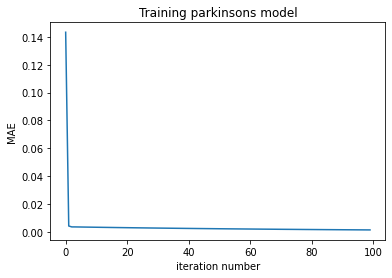

In [ ]:
#plot MEA,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GDwB_result[1])),GDwB_result[1])

Last RMSE: 6.0454931142239


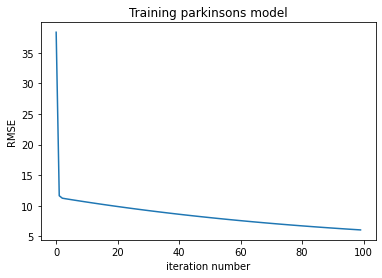

In [ ]:
#plot RMSE,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GDwB_result[2])),GDwB_result[2])
print('Last RMSE:',GDwB_result[2][-1])

##### airq402 data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'price'
X_train = airq402_train.drop(opt,axis=1).to_numpy()
Y_train = airq402_train[opt].to_numpy().reshape(-1,1)
X_test = airq402_test.drop(opt,axis=1).to_numpy()
Y_test = airq402_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
#Gradient descent method to find θ* with steplength-backtracking
mu = 0.0000001
alpha = 0.5
beta = 0.5
K = 100
GDwB_result = GDwB(X_train,Y_train,X_test,Y_test,mu,K,alpha,beta)
print(GDwB_result[0])

[[0.0005664 ]
 [0.09710169]
 [0.10141892]
 [0.00010471]
 [0.00007811]]


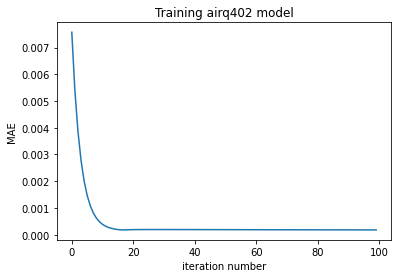

In [ ]:
#plot MEA,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GDwB_result[1])),GDwB_result[1])

Last RMSE: 52.95557197568985


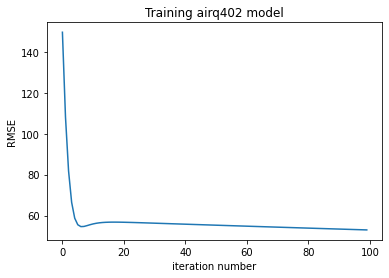

In [ ]:
#plot RMSE,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GDwB_result[2])),GDwB_result[2])
print('Last RMSE:',GDwB_result[2][-1])

#### 2. Steplength-bolddriver

Stepsize-bolddriver algorithm

$ \mu = \mu_0 $

$ \text{If: } f(x^{(k)}) > f(x^{(k-1)}) $

> $ \mu = \nu \mu $

$ \text{Else: } $

> $\mu = \gamma \mu $

$\text{return } \mu $

Where $\gamma = 1.05$ and $\nu = 0.5$

In [ ]:
#Function to calculate gradient descent, MAE and RMSE
def GDwBold(X_tr,Y_tr,X_te,Y_te,mu,K,gamma,nu):
  theta_i = np.zeros((X_tr.shape[1],1))
  mae = np.zeros(K) #array of mean absolute errores between thetas before and after the iteration
  rmse = np.zeros(K) #array of root-mean-square error between predited output on test data and test output data
  MU = np.zeros(K) #array of step sizes
  for i in range(K):
    Y_te_p = X_te @ theta_i #predited output on the test data
    rmse[i] = RMSE(Y_te,Y_te_p)
    theta_i_b = theta_i
    theta_i = theta_i - mu*gradient(X_tr,Y_tr,theta_i)
    MU[i] = mu
    mu = StepBold(X_tr,Y_tr,theta_i_b,theta_i,mu,gamma,nu)
    mae[i] = MAE(theta_i_b,theta_i)
  return [theta_i,mae,rmse,MU]

In [ ]:
#Function
def StepBold(X,Y,theta_b,theta,mu,gamma,nu):
  if loss(X,Y,theta) > loss(X,Y,theta_b):
    mu = nu * mu
  else:
    mu = gamma * mu
  return mu

In [ ]:
#Auxiliary fuctions
loss = lambda X,Y,theta: ((Y - X @ theta)**2).mean()
gradient = lambda X,Y,theta: -2/(Y.shape[0]) * X.T @ (Y - X @ theta)
MAE = lambda theta_b,theta_a: abs(theta_b-theta_a).mean()
RMSE = lambda Y_true,Y_pred: (((Y_true-Y_pred)**2).mean())**(1/2)

##### winequality data set

In [ ]:
#Split of the data sets into input and output variables
X_train = winequality_train.drop('quality',axis=1).to_numpy()
Y_train = winequality_train['quality'].to_numpy().reshape(-1,1)
X_test = winequality_test.drop('quality',axis=1).to_numpy()
Y_test = winequality_test['quality'].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
mu = 0.001
gamma = 1.05
nu = 0.5
K = 100
GDwBold_result = GDwBold(X_train,Y_train,X_test,Y_test,mu,K,gamma,nu)
print(GDwBold_result[0])

[[0.0867308 ]
 [0.05952945]
 [0.09735334]
 [0.52668289]]


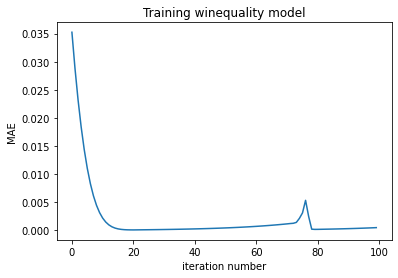

In [ ]:
#plot MEA,i
plt.title("Training winequality model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GDwBold_result[1])),GDwBold_result[1])

Last RMSE: 0.7538895132663505


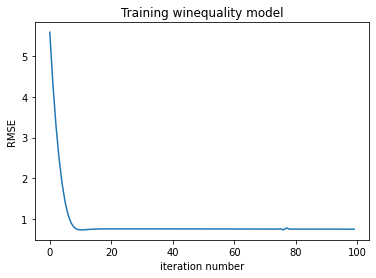

In [ ]:
#plot RMSE,i
plt.title("Training winequality model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GDwBold_result[2])),GDwBold_result[2])
print('Last RMSE:',GDwBold_result[2][-1])

##### Parkinsons data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'total_UPDRS'
X_train = parkinsons_train.drop(opt,axis=1).to_numpy()
Y_train = parkinsons_train[opt].to_numpy().reshape(-1,1)
X_test = parkinsons_test.drop(opt,axis=1).to_numpy()
Y_test = parkinsons_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
mu = 0.0001
gamma = 1.05
nu = 0.5
K = 100
GDwBold_result = GDwBold(X_train,Y_train,X_test,Y_test,mu,K,gamma,nu)
print(GDwBold_result[0])

[[ 0.00048285]
 [-0.00564649]
 [ 0.09067415]
 [ 1.07239693]]


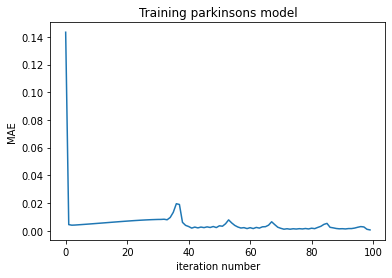

In [ ]:
#plot MEA,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GDwBold_result[1])),GDwBold_result[1])

Last RMSE: 3.9698564049715492


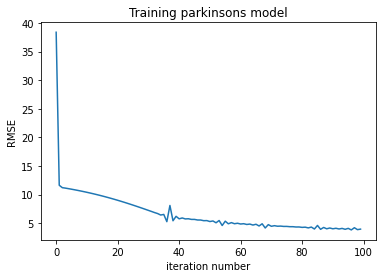

In [ ]:
#plot RMSE,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GDwBold_result[2])),GDwBold_result[2])
print('Last RMSE:',GDwBold_result[2][-1])

##### airq402 data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'price'
X_train = airq402_train.drop(opt,axis=1).to_numpy()
Y_train = airq402_train[opt].to_numpy().reshape(-1,1)
X_test = airq402_test.drop(opt,axis=1).to_numpy()
Y_test = airq402_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
mu = 0.000001
gamma = 1.05
nu = 0.5
K = 100
GDwBold_result = GDwBold(X_train,Y_train,X_test,Y_test,mu,K,gamma,nu)
print(GDwBold_result[0])

[[0.00287099]
 [0.47259678]
 [0.05090907]
 [0.00054867]
 [0.00045819]]


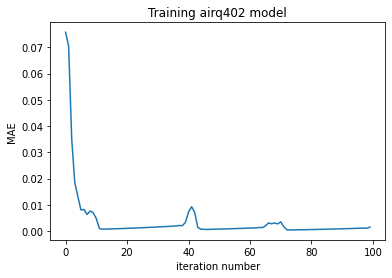

In [ ]:
#plot MEA,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(GDwBold_result[1])),GDwBold_result[1])

Last RMSE: 32.75128934147042


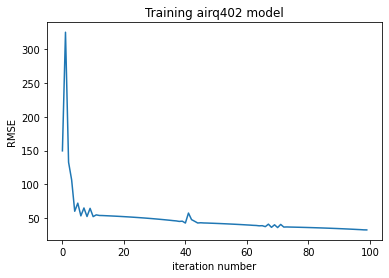

In [ ]:
#plot RMSE,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(GDwBold_result[2])),GDwBold_result[2])
print('Last RMSE:',GDwBold_result[2][-1])

#### 3. Look-ahead optimizer

Lookahead first updates the “fast weights” k times using any standard optimizer in its inner loop before updating the “slow weights” once in the direction of the final fast weights.
Algorithm

For t = 1,2,..:

> $\theta_{t,0} = \phi_{t-1}$

> For i=1,2,...k:

>> $\theta_{t,i} = \theta_{t,i-1} + A(L,\theta_{t,i-1},data)$

> $\phi_t = \phi_{t-1} + \alpha (\theta_{t,k}-\phi_{t-1})$

Where A is any standard optimization algorithm

Source: https://arxiv.org/pdf/1907.08610.pdf


In [ ]:
#Function look-head optmizer, MAE and RMSE
def LH(X_tr,Y_tr,X_te,Y_te,alpha,mu,T,K):
  phi = np.zeros((X_tr.shape[1],1))
  mae = np.zeros(T) #array of mean absolute errores between thetas before and after the iteration
  rmse = np.zeros(T) #array of root-mean-square error between predited output on test data and test output data
  for t in range(T):
    phi_b = phi
    Y_te_p = X_te @ phi #predited output on the test data
    rmse[t] = RMSE(Y_te,Y_te_p)
    theta = GD(X_tr,Y_tr,phi,mu,K)
    phi = phi + alpha * (theta-phi)
    mae[t] = MAE(phi_b,phi)
  return [phi,mae,rmse]


In [ ]:
#Function to calculate gradient descent
def GD(X_tr,Y_tr,theta,mu,K):
  for i in range(K):
    theta = theta - mu*gradient(X_tr,Y_tr,theta)
  return theta

In [ ]:
#Auxiliry functions
gradient = lambda X,Y,theta: -2/(Y.shape[0]) * X.T @ (Y - X @ theta)
MAE = lambda theta_b,theta_a: abs(theta_b-theta_a).mean()
RMSE = lambda Y_true,Y_pred: (((Y_true-Y_pred)**2).mean())**(1/2)

##### winequality data set

In [ ]:
#Split of the data sets into input and output variables
X_train = winequality_train.drop('quality',axis=1).to_numpy()
Y_train = winequality_train['quality'].to_numpy().reshape(-1,1)
X_test = winequality_test.drop('quality',axis=1).to_numpy()
Y_test = winequality_test['quality'].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
mu = 0.001
alpha = 0.5
T = 100
K = 100
LH_result = LH(X_train,Y_train,X_test,Y_test,alpha,mu,T,K)
print(LH_result[0])

[[0.22029003]
 [0.20156467]
 [0.30858508]
 [0.4966587 ]]


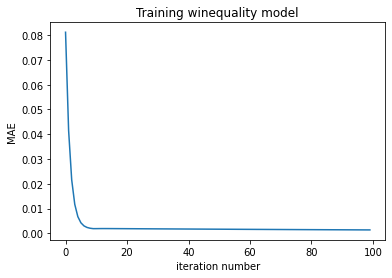

In [ ]:
#plot MEA,i
plt.title("Training winequality model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(LH_result[1])),LH_result[1])

Last RMSE: 0.731900449114435


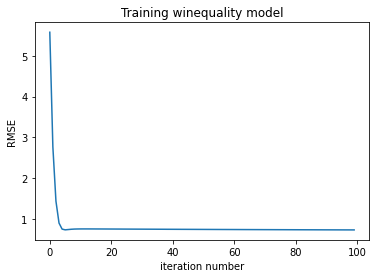

In [ ]:
#plot RMSE,i
plt.title("Training winequality model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(LH_result[2])),LH_result[2])
print('Last RMSE:',LH_result[2][-1])

##### Parkinsons data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'total_UPDRS'
X_train = parkinsons_train.drop(opt,axis=1).to_numpy()
Y_train = parkinsons_train[opt].to_numpy().reshape(-1,1)
X_test = parkinsons_test.drop(opt,axis=1).to_numpy()
Y_test = parkinsons_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
mu = 0.0001
alpha = 0.5
T = 100
K = 100
LH_result = LH(X_train,Y_train,X_test,Y_test,alpha,mu,T,K)
print(LH_result[0])

[[ 0.00286781]
 [-0.01298889]
 [ 0.05403624]
 [ 1.19476942]]


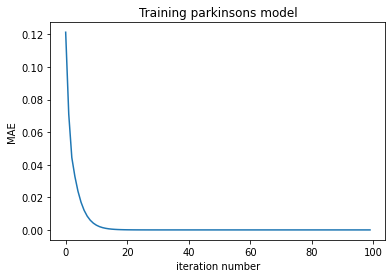

In [ ]:
#plot MEA,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(LH_result[1])),LH_result[1])

Last RMSE: 3.380724181897014


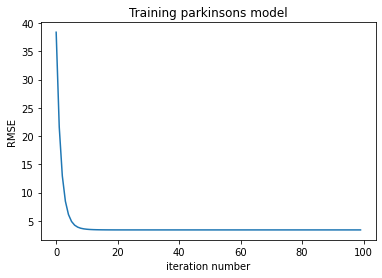

In [ ]:
#plot RMSE,i
plt.title("Training parkinsons model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(LH_result[2])),LH_result[2])
print('Last RMSE:',LH_result[2][-1])

##### airq402 data set

In [ ]:
#Split of the data sets into input and output variables
opt = 'price'
X_train = airq402_train.drop(opt,axis=1).to_numpy()
Y_train = airq402_train[opt].to_numpy().reshape(-1,1)
X_test = airq402_test.drop(opt,axis=1).to_numpy()
Y_test = airq402_test[opt].to_numpy().reshape(-1,1)
#Adding the bias
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [ ]:
mu = 0.0000001
alpha = 0.5
T = 100
K = 100
LH_result = LH(X_train,Y_train,X_test,Y_test,alpha,mu,T,K)
print(LH_result[0])

[[0.00632341]
 [0.79909927]
 [0.00930643]
 [0.00138116]
 [0.00209606]]


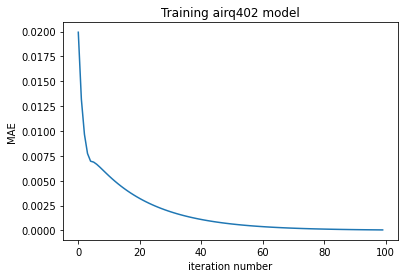

In [ ]:
#plot MEA,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("MAE")
plt.plot(range(len(LH_result[1])),LH_result[1])

Last RMSE: 21.452976511410608


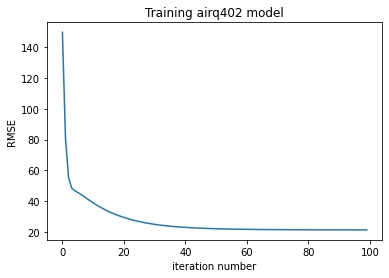

In [ ]:
#plot RMSE,i
plt.title("Training airq402 model")
plt.xlabel("iteration number")
plt.ylabel("RMSE")
plt.plot(range(len(LH_result[2])),LH_result[2])
print('Last RMSE:',LH_result[2][-1])

Conclusion

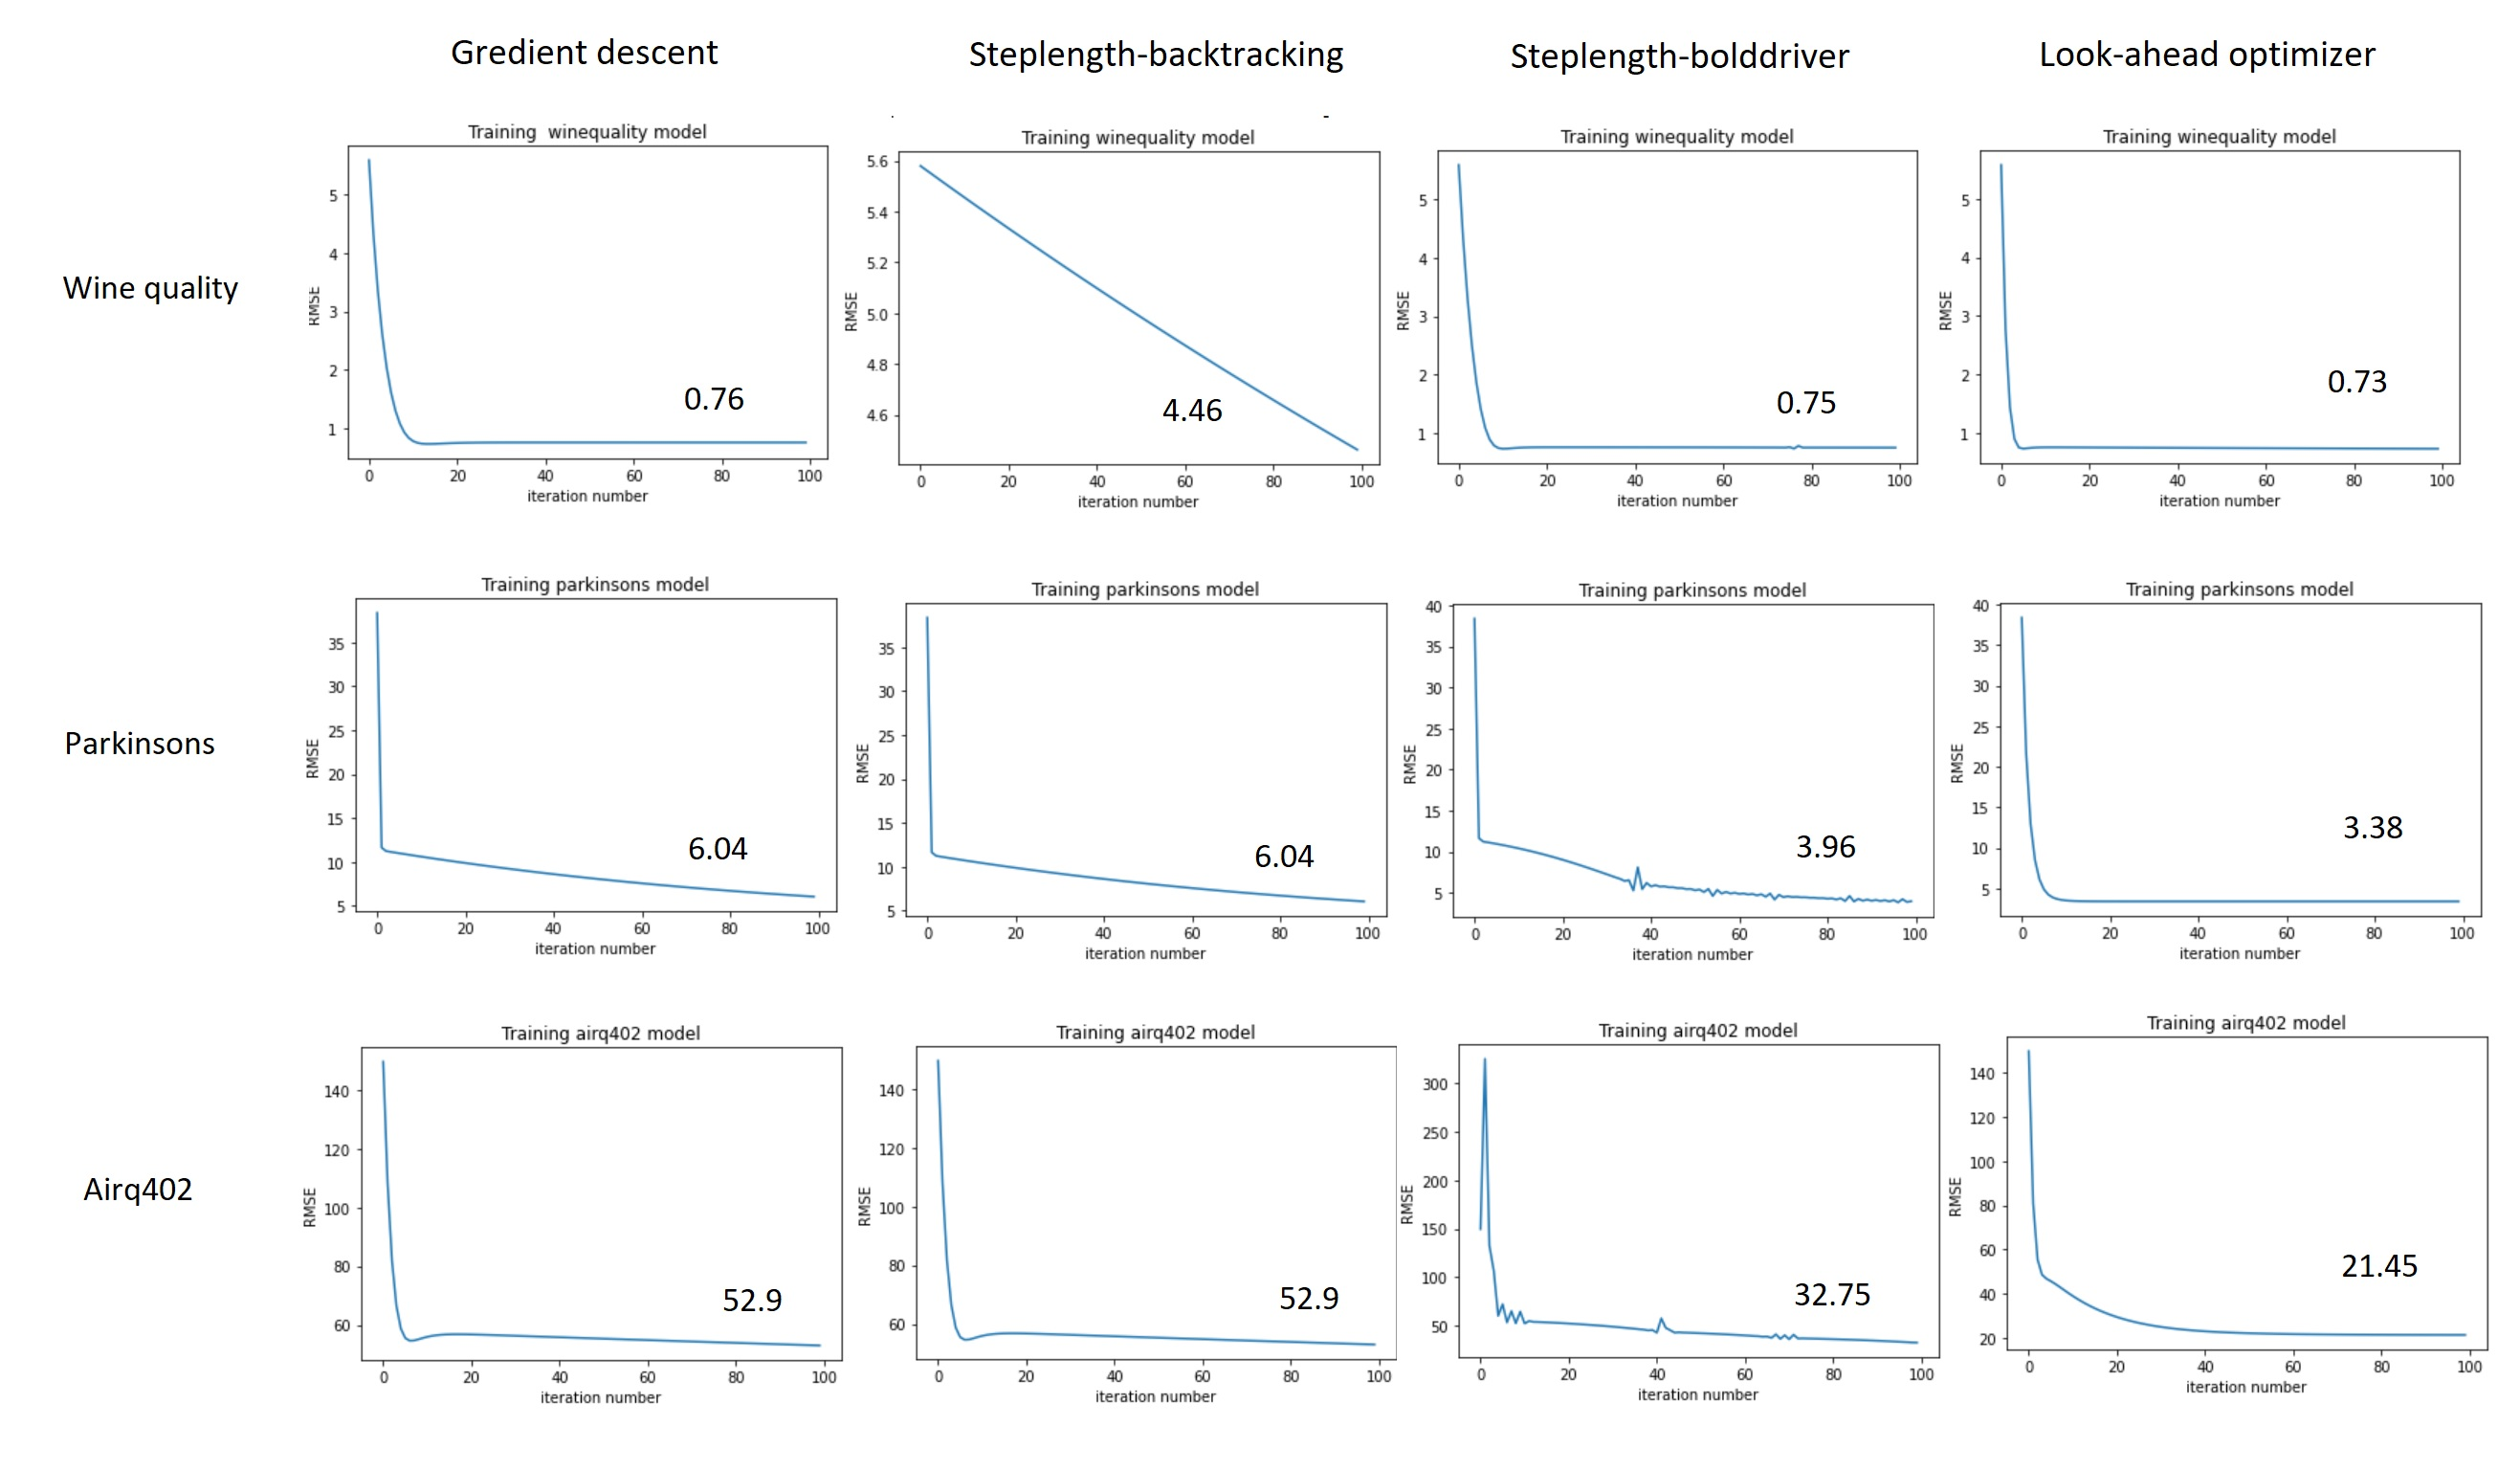

As we can see in the above figure, the **look-ahead optimazer** gaves the lower last RMSE for the test data, after 100 iterations.